# Artificial Intelligence
# 464/664
# Assignment #5

## General Directions for this Assignment

00. We're using a Jupyter Notebook environment (tutorial available here: https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html),
01. Read the entire notebook before beginning your work, 
02. Output format should be exactly as requested (it is your responsibility to make sure notebook looks as expected on Gradescope),
03. Each helper function should be preceeded by documentation (Markdown cell), 
04. Each helper function should be followed by three assert-style unit tests,
05. Functions should do only one thing,
06. Check submission deadline on Gradescope, 
07. Rename the file to Last_First_assignment_5, 
08. Submit your notebook (as .ipynb, not PDF) using Gradescope, and
09. Do not submit any other files.

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import networkx as nx
from copy import deepcopy

You might need to do a install to work with networkx

```
pip install networkx
```

## Map Coloring

It turns out that any division of a plane into contiguous regions can be colored such that no two adjacent regions are the same color by using only four colors (see [Four Color Theorem](http://en.wikipedia.org/wiki/Four_color_theorem), for more details) This **Constraint Satisfaction Problem** can be viewed as a constraint graph, where variables are nodes and no adjacent nodes can be of the same color.


Our first constraint graph is the dictionary `connecticut_graph` with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.

In [2]:
connecticut_graph = { "nodes": ["Fairfield", "Litchfield", "New Haven", "Hartford", "Middlesex", "Tolland", "New London", "Windham"],
                "edges": [(0,1), (0,2), (1,2), (1,3), (2,3), (2,4), (3,4), (3,5), (3,6), (4,6), (5,6), (5,7), (6,7)],
                "coordinates": [( 46, 52), ( 65,142), (104, 77), (123,142), (147, 85), (162,140), (197, 94), (217,146)]}
print(connecticut_graph)

{'nodes': ['Fairfield', 'Litchfield', 'New Haven', 'Hartford', 'Middlesex', 'Tolland', 'New London', 'Windham'], 'edges': [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (3, 5), (3, 6), (4, 6), (5, 6), (5, 7), (6, 7)], 'coordinates': [(46, 52), (65, 142), (104, 77), (123, 142), (147, 85), (162, 140), (197, 94), (217, 146)]}


<a id="create_adjlist"></a>
### create_adjlist

This function creates an adjacency list from a constraint graph, which is a representation of neighbor relationships between nodes.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.

**returns** 


* **adjacency_list** Dict: Each key corresponds to a node, and the value is a list of nodes that are its neighbors.

In [3]:
def create_adjlist(constraint_graph):
    adjacency_list = {}
    for node in constraint_graph["nodes"]:
        adjacency_list[node] = []
    for edge in constraint_graph["edges"]:
        node0 = constraint_graph["nodes"][edge[0]]
        node1 = constraint_graph["nodes"][edge[1]]
        adjacency_list[node0].append(node1)
        adjacency_list[node1].append(node0)
    return adjacency_list

In [4]:
# Test 1: Simple triangle graph
graph1 = {
    "nodes": ["A", "B", "C"],
    "edges": [(0, 1), (1, 2), (2, 0)]
}
expected_adjlist1 = {
    "A": ["B", "C"],
    "B": ["A", "C"],
    "C": ["A", "B"]
}
result_adjlist1 = create_adjlist(graph1)
assert all(set(result_adjlist1[node]) == set(expected_adjlist1[node]) for node in result_adjlist1), "Test 1 failed: Triangle graph adjacency list incorrect."

# Test 2: Line graph
graph2 = {
    "nodes": ["A", "B", "C"],
    "edges": [(0, 1), (1, 2)]
}
expected_adjlist2 = {
    "A": ["B"],
    "B": ["A", "C"],
    "C": ["B"]
}
result_adjlist2 = create_adjlist(graph2)
assert all(set(result_adjlist2[node]) == set(expected_adjlist2[node]) for node in result_adjlist2), "Test 2 failed: Line graph adjacency list incorrect."

# Test 3: Single node with no edges
graph3 = {
    "nodes": ["A"],
    "edges": []
}
expected_adjlist3 = {
    "A": []
}
result_adjlist3 = create_adjlist(graph3)
assert all(set(result_adjlist3[node]) == set(expected_adjlist3[node]) for node in result_adjlist3), "Test 3 failed: Single node graph adjacency list incorrect."

<a id="is_consistent"></a>
### is_consistent

This function determines if assigning a given value (color) to a variable (node) is consistent with the current assignment, following the constraint that no two adjacent nodes can share the same value.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **adjlist** Dict: the adjacency list representing the graph, where each key is a node and the value is a list of neighboring nodes.
* **assigned** Dict: A dictionary where each key is a node and the value is the color assigned to that node.
* **var** str: The node for which the consistency of the assignment is being checked.
* **value** str: The color value being considered for assignment to the node var.

**returns** 


* **True** or **False** Bool: Returns True if assigning the value to var is consistent with the current assignments, ensuring that no two adjacent nodes have the same value. Returns False otherwise.

In [5]:
def is_consistent(constraint_graph, adjlist, assigned, var, value):
    if var in adjlist:
        neighbors = adjlist[var]
    else:
        neighbors = []
    for neighbor in neighbors:
        if neighbor in assigned and assigned[neighbor] == value:
            return False
    return True

In [6]:
# Test 1: Checking consistency in an empty assignment scenario
adjlist1 = {'A': ['B', 'C'], 'B': ['A', 'C'], 'C': ['A', 'B']}
assigned1 = {}
assert is_consistent({}, adjlist1, assigned1, 'A', 'Red'), "Test 1 failed: 'A' should be consistent as there are no assignments."

# Test 2: Checking consistency with one neighbor assigned the same value
adjlist2 = {'A': ['B'], 'B': ['A']}
assigned2 = {'B': 'Red'}
assert not is_consistent({}, adjlist2, assigned2, 'A', 'Red'), "Test 2 failed: 'A' should be inconsistent as 'B' is assigned the same value."

# Test 3: Checking consistency with neighbors having different values
adjlist3 = {'A': ['B', 'C'], 'B': ['A'], 'C': ['A']}
assigned3 = {'B': 'Red', 'C': 'Blue'}
assert is_consistent({}, adjlist3, assigned3, 'A', 'Green'), "Test 3 failed: 'A' should be consistent as no neighbor has 'Green'."

<a id="degree_heuristic"></a>
### degree_heuristic

This function selects the next variable to be assigned a value based on the degree heuristic, i.e. nodes with largest degree, i.e. most neighbors.

* **adjlist** Dict: the adjacency list representing the graph, where each key is a node and the value is a list of neighboring nodes.
* **assigned** Dict: A dictionary where each key is a node and the value is the color assigned to that node.

**returns** 


* **selected_var** str or None: The variable with the highest degree among unassigned variables. Returns None if all variables are assigned.

In [7]:
def degree_heuristic(adjlist, assigned):
    # create an unassigned list 
    unassigned = []
    for var in adjlist:
        if var not in assigned:
            unassigned.append(var)
    max_length = -1
    selected_var = None
    for var in unassigned:
        if len(adjlist[var]) > max_length:
            max_length = len(adjlist[var])
            selected_var = var
    return selected_var

In [8]:
# Test 1: Simple case with three nodes
adjlist1 = {'A': ['B', 'C'], 'B': ['A', 'C'], 'C': ['A', 'B']}
assigned1 = {'A': 'Red'}
assert degree_heuristic(adjlist1, assigned1) in ['B', 'C'], "Test 1 failed: The variable with the highest degree should be either 'B' or 'C'."

# Test 2: All nodes are assigned
adjlist2 = {'A': ['B'], 'B': ['A']}
assigned2 = {'A': 'Red', 'B': 'Blue'}
assert degree_heuristic(adjlist2, assigned2) is None, "Test 2 failed: No variable should be selected since all are assigned."

# Test 3: Selecting among multiple unassigned variables
adjlist3 = {'A': ['B', 'C', 'D'], 'B': ['A', 'D'], 'C': ['A'], 'D': ['A', 'B']}
assigned3 = {'C': 'Green'}
assert degree_heuristic(adjlist3, assigned3) == 'A', "Test 3 failed: 'A' should be selected as it has the highest degree among unassigned variables."

<a id="lcv"></a>
### lcv

This function implements the Least Constrained Values (LCV) heuristic. It sorts the possible values for a variable based on the number of choices remaining for adjacent unassigned variables into a list.

* **adjlist** Dict: the adjacency list representing the graph, where each key is a node and the value is a list of neighboring nodes.
* **assigned** Dict: A dictionary where each key is a node and the value is the color assigned to that node.
* **var** str: The variable for which the LCV heuristic is applied to sort its possible values.
* **domains** Dict: A dictionary where each key is a variable, and the value is a set of possible values (colors) that the variable can take.


**returns** 


* **values_sorted** List: A list of values (colors) sorted according to the LCV heuristic, where the first element is the least constraining value for adjacent unassigned variables.

In [9]:
def lcv(adjlist, assigned, var, domains):
    unassigned_neighbors = []
    for neighbor in adjlist[var]:
        if neighbor not in assigned:
            unassigned_neighbors.append(neighbor)
    shared_list = []
    for value in domains[var]:
        shared = 0
        for neighbor in unassigned_neighbors:
            if value in domains[neighbor]:
                shared += 1
        shared_list.append((value, shared))
    shared_list_sorted = sorted(shared_list, key=lambda item: item[1])
    values_sorted = []
    for tup in shared_list_sorted:
        value = tup[0]
        values_sorted.append(value)
    return values_sorted

In [10]:
# Test 1: Simple case with clear LCV
adjlist1 = {'A': ['B', 'C'], 'B': ['A'], 'C': ['A']}
assigned1 = {}
domains1 = {'A': {'Red', 'Blue'}, 'B': {'Blue'}, 'C': {'Red', 'Blue'}}
assert lcv(adjlist1, assigned1, 'A', domains1) == ['Red', 'Blue'], "Test 1 failed: 'Red' should be less constraining than 'Blue' for 'A'."

# Test 2: All neighbors are assigned
adjlist2 = {'A': ['B'], 'B': ['A']}
assigned2 = {'B': 'Red'}
domains2 = {'A': {'Red', 'Blue'}, 'B': {'Red'}}
assert lcv(adjlist2, assigned2, 'A', domains2) == ['Red', 'Blue'] or lcv(adjlist2, assigned2, 'A', domains2) == ['Blue', 'Red'], "Test 2 failed: Value order should not matter when all neighbors are assigned."

# Test 3: Determining LCV for "Hartford" in the Connecticut graph
adjlist3 = create_adjlist(connecticut_graph)
assigned3 = {}
domains3 = {
    "Fairfield": {'Red', 'Green', 'Blue'},
    "Litchfield": {'Red', 'Green'},
    "New Haven": {'Red', 'Blue'},
    "Hartford": {'Red', 'Green', 'Blue'},
    "Middlesex": {'Green', 'Blue'},
    "Tolland": {'Red', 'Blue'},
    "New London": {'Red', 'Green', 'Blue'},
    "Windham": {'Red', 'Blue'}
}
lcv_result = lcv(adjlist3, assigned3, "Hartford", domains3)
assert lcv_result[0] == 'Green', "Test 3 failed: 'Green' should be the least constraining for 'Hartford'."
assert set(lcv_result[1:]) == {'Red', 'Blue'}, "Test 3 failed: The order of 'Red' and 'Blue' does not matter."

<a id="forward_check"></a>
### forward_check

This function implements forward checking by updating the domains of unassigned neighboring variables of a newly assigned variable. If assigning a value to a variable, it removes that value from the domains of its unassigned neighbors to maintain consistency.

* **adjlist** Dict: the adjacency list representing the graph, where each key is a node and the value is a list of neighboring nodes.
* **assigned** Dict: A dictionary where each key is a node and the value is the color assigned to that node.
* **var** str: The variable to which a value has been assigned.
* **domains** Dict: A dictionary where each key is a variable, and the value is a set of possible values (colors) that the variable can take.
* **value** str: The value assigned to the variable var.



**returns** 


* **new_domains** Dict or None: An updated dictionary of domains after applying forward checking. If the domain of any neighbor becomes empty, it returns None to indicate a failure.

In [11]:
def forward_check(adjlist, assigned, var, domains, value):
    new_domains = deepcopy(domains)
    for neighbor in adjlist[var]:
        if neighbor not in assigned and value in new_domains[neighbor]:
            new_domains[neighbor].discard(value)
            if not new_domains[neighbor]:
                return None
    return new_domains

In [12]:
# Setup common graph and initial domains
adjlist = create_adjlist(connecticut_graph)
initial_domains = {
    "Fairfield": {'Red', 'Green', 'Blue'},
    "Litchfield": {'Red', 'Green', 'Blue'},
    "New Haven": {'Red', 'Green', 'Blue'},
    "Hartford": {'Red', 'Green', 'Blue'},
    "Middlesex": {'Red', 'Green', 'Blue'},
    "Tolland": {'Red', 'Green', 'Blue'},
    "New London": {'Red', 'Green', 'Blue'},
    "Windham": {'Red', 'Green', 'Blue'},
}

# Test 1: Assign 'Red' to "Hartford" and check domain updates
assigned = {"Hartford": 'Red'}
new_domains = forward_check(adjlist, assigned, "Hartford", initial_domains, 'Red')
assert all('Red' not in new_domains[neighbor] for neighbor in adjlist["Hartford"]), "Test 1 failed: Neighbors' domains not updated correctly."

# Test 2: Assign 'Green' to "Hartford", leading to an empty domain for a neighbor
assigned = {"Hartford": 'Green'}
restrictive_domains = deepcopy(initial_domains)
restrictive_domains["Litchfield"] = {'Green'}
assert forward_check(adjlist, assigned, "Hartford", restrictive_domains, 'Green') is None, "Test 2 failed: Should return None due to empty domain."

# Test 3: Assign 'Green' to "Hartford" causing an empty domain for "Tolland"
assigned3 = {"Hartford": 'Green'}
# Setting up domains so that "Tolland" only has 'Green', which will be removed due to Hartford's assignment
constrained_domains3 = deepcopy(initial_domains)
constrained_domains3["Tolland"] = {'Green'}
# Expecting None since "Tolland" will have an empty domain after forward checking
result_domains3 = forward_check(adjlist, assigned3, "Hartford", constrained_domains3, 'Green')
assert result_domains3 is None, "Test 3 failed: Should return None due to empty domain for 'Tolland'."

<a id="trace_print"></a>
### trace_print

This function outputs a message to the console only if tracing is enabled. 

* **message** str: The message to be printed to the console.
* **trace** str: A boolean flag that determines whether the message should be printed. If True, the message is printed; if False, nothing is printed.


**returns** 


* **None**

In [13]:
def trace_print(message, trace):
    if trace:
        print(message)

In [14]:
# NOTE: THIS IS COMMENTED OUT TO NOT AFFECT THE OUTPUT OF PROBLEM1-4
# please uncomment the following yourself to assert-test the above unit function (if you bother haha)

# from io import StringIO
# import sys

# captured_output = StringIO()          
# sys.stdout = captured_output          
# trace_print("Test message", True)     
# assert "Test message" in captured_output.getvalue()
# sys.stdout = sys.__stdout__           

# captured_output = StringIO()          
# sys.stdout = captured_output          
# trace_print("Test message", False)    
# assert captured_output.getvalue().strip() == ""
# sys.stdout = sys.__stdout__           

# captured_output = StringIO()          
# sys.stdout = captured_output          
# trace_print("Different test message", False)  
# assert captured_output.getvalue().strip() == ""
# sys.stdout = sys.__stdout__

<a id="backtrack"></a>
### backtrack

This function implements the backtracking. It recursively selects a variable using the degree heuristic and iterates over its domain sorted by the LCV heuristic. It checks for consistency and applies forward checking at each step. If a variable assignment leads to a dead-end, it backtracks by undoing the assignment and trying alternative values. 

* **constraint_graph** Dict: The graph representing the map, detailing nodes and edges.
* **color_list** List: The list of colors available for coloring.
* **trace** Dict: If set to True, enables logging of the decision-making process.
* **adjlist** Dict: The adjacency list representing the graph structure.
* **assigned** Dict: A dictionary where each key is a node and the value is the color assigned to that node.
* **domains** Dict: A dictionary where each key is a variable, and the value is a set of possible values (colors) that the variable can take.


**returns** 


* **result** List[Tuple[Str, Str]] or None: A list of tuples, each containing a node and its assigned color, if a valid coloring exists. Returns None if no valid coloring is found.

In [15]:
def backtrack(constraint_graph, color_list, trace, adjlist, assigned, domains):
    if len(assigned) == len(constraint_graph["nodes"]):
        return [(node, assigned[node]) for node in constraint_graph["nodes"]]
    var = degree_heuristic(adjlist, assigned)
    trace_print(f"⭕️Degree Heuristic selected node: {var}", trace)
    lcv_sort_values = lcv(adjlist, assigned, var, domains)
    for value in lcv_sort_values:
        if not is_consistent(constraint_graph, adjlist, assigned, var, value):
            continue
        assigned[var] = value
        trace_print(f"👀Assigned color {value} to node {var}, applying forward checking...", trace)
        domains_new = forward_check(adjlist, assigned, var, domains, value)
        if domains_new is None:
            assigned.pop(var)
            continue
        trace_print(f"✅Forward checking passed for {var} = {value}", trace)
        result = backtrack(constraint_graph, color_list, trace, adjlist, assigned, domains_new)
        if result is not None:
            return result
        trace_print(f"🔙Backtracking: removing color {value} from node {var}", trace)
        assigned.pop(var)
    trace_print(f"😅 None is returned for variable '{var}', no valid value found.", trace)
    return None

In [16]:
# Test1
constraint_graph = {
    "nodes": ["A", "B"],
    "edges": [(0, 1)]
}
color_list = ["Red", "Blue"]
adjlist = create_adjlist(constraint_graph)
assigned = {}
domains = {node: set(color_list) for node in constraint_graph["nodes"]}
result = backtrack(constraint_graph, color_list, False, adjlist, assigned, domains)
assert result == [('A', 'Red'), ('B', 'Blue')] or result == [('A', 'Blue'), ('B', 'Red')]
# Test2
constraint_graph = {
    "nodes": ["A", "B", "C"],
    "edges": [(0, 1), (1, 2), (0, 2)]
}
color_list = ["Red", "Blue"]
adjlist = create_adjlist(constraint_graph)
assigned = {}
domains = {node: set(color_list) for node in constraint_graph["nodes"]}
result = backtrack(constraint_graph, color_list, False, adjlist, assigned, domains)
assert result is None
# Test3 
constraint_graph = {
    "nodes": ["A", "B", "C", "D"],
    "edges": [(0, 1), (1, 2), (2, 3), (3, 0), (0, 2)]
}
color_list = ["Red", "Blue", "Green"]
adjlist = create_adjlist(constraint_graph)
assigned = {}
domains = {node: set(color_list) for node in constraint_graph["nodes"]}
result = backtrack(constraint_graph, color_list, False, adjlist, assigned, domains)
assert isinstance(result, list) and len(result) == 4

<a id="color_map"></a>
## color_map

This function colors a map provided as a constraint graph. The inputs are the constraint graph and a list of colors. Implementation should feature: 1) Backtracking, 2) Forward Checking, 3) variables picked using the Degreee Heuristic, and 4) Values picked using the Least Constrained Values heuristic. Each feature should be its own helper function, documented and tested.  

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **color_list** List: the domain available to variables at the start of the CSP.
* **trace** Bool: a flag that when set to True, prints out statements that show what it is currently doing (in terms of the four features)


**returns** 


* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples, where the ordering matches the original ordering of nodes in the constraint_graph. For example, if we had `["A", "B"]` as nodes and `["Yellow", "Green"]` as colors, your function might return `[("A", "Yellow"), ("B", "Green")]`If the CSP cannot find a solution, `None` is returned.

In [17]:
def color_map(constraint_graph, color_list, trace=False):
    # Fix. Everything is colored red right now. 
    # With your implementation, if a solution can't be found, it should return `None`.
    # Add features: 
    # 1) Backtracking, 
    # 2) Forward Checking, 
    # 3) Variables picked using the Degreee Heuristic, and 
    # 4) Values picked using the Least Constrained Values heuristic. 
    # Features should be helper functions, documented and tested.
    adjacency_list = create_adjlist(constraint_graph)
    assigned = {}
    domains = {}
    for node in constraint_graph["nodes"]:
        domains[node] = set(color_list)
    return backtrack(constraint_graph, color_list, trace, adjacency_list, assigned, domains)

<a id="color_map"></a>
## test_coloring

This function tests the solution resulting from `color_map`. Adjacent nodes in the solution cannot be of the same color.

* **constraint_graph** Dict: the dictionary with keys: nodes, edges, and coordinates.
* **solution** List[Tuple[Str][Str]]: a list of (node name, assigned color) tuples


**returns** 


Warning statement if there's a violation.

In [18]:
def test_coloring(constraint_graph, solution):
    nodes = constraint_graph[ "nodes"]
    edges = constraint_graph["edges"]
    for start, end in edges:
        try:
            assert solution[start][1] != solution[end][1]
        except AssertionError:
            print(f"{nodes[start]} and {nodes[end]} are adjacent but have the same color.")

<a id="draw_map"></a>
## draw_map

This function uses Networkx to draw the `constraint_graph`. Nodes are colored using `solution`. 

* **title** Str: Title for the cartoon
* **constraint_graph** Dict with three keys: 1) "nodes," which is a ordered list of strings that represent the nodes; 2) "edges," which indicates with tuples which nodes are adjacent; and 3) the "coordinates" key helps NetworkX make cartoons.
* **size** Tuple[Int, Int]: inches wide x inches tall, so (8,10) results in 8"x10" rendering (depends on monitor)
* **solution** List[Tuple[Str][Str]]]: list of color assignments. Each item in the list is a (node name, assigned color) tuple. If set to None, all nodes are colored red. 


**returns** 

None. Draws constraint graph with specified color assignments for nodes. 

In [19]:
def draw_map(title, constraint_graph, size, solution=None):
    def as_dictionary(a_list):
        dct = {}
        for i, e in enumerate(a_list):
            dct[i] = e
        return dct
    
    G = nx.Graph()
    
    labels = as_dictionary(constraint_graph["nodes"])
    pos = as_dictionary(constraint_graph["coordinates"])
    
    # create a List of Nodes as indices to match the "edges" entry.
    nodes = [n for n in range(0, len(constraint_graph["nodes"]))]

    if solution:
        colors = [c for n, c in solution]
    else:
        colors = ['red' for c in range(0,len(constraint_graph["nodes"]))]

    G.add_nodes_from(nodes)
    G.add_edges_from(constraint_graph["edges"])

    plt.figure(figsize=size, dpi=100)
    plt.title(title)
    nx.draw(G, node_color = colors, with_labels = True, labels = labels, pos = pos)
    
#    plt.savefig(name + ".png")

## Problem 1. Color Connecticut with Four Colors

In [20]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green", "yellow"], trace=True)

⭕️Degree Heuristic selected node: Hartford
👀Assigned color green to node Hartford, applying forward checking...
✅Forward checking passed for Hartford = green
⭕️Degree Heuristic selected node: New Haven
👀Assigned color red to node New Haven, applying forward checking...
✅Forward checking passed for New Haven = red
⭕️Degree Heuristic selected node: New London
👀Assigned color red to node New London, applying forward checking...
✅Forward checking passed for New London = red
⭕️Degree Heuristic selected node: Litchfield
👀Assigned color yellow to node Litchfield, applying forward checking...
✅Forward checking passed for Litchfield = yellow
⭕️Degree Heuristic selected node: Middlesex
👀Assigned color yellow to node Middlesex, applying forward checking...
✅Forward checking passed for Middlesex = yellow
⭕️Degree Heuristic selected node: Tolland
👀Assigned color yellow to node Tolland, applying forward checking...
✅Forward checking passed for Tolland = yellow
⭕️Degree Heuristic selected node: Fairf

## Test Connecticut Solution

In [21]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

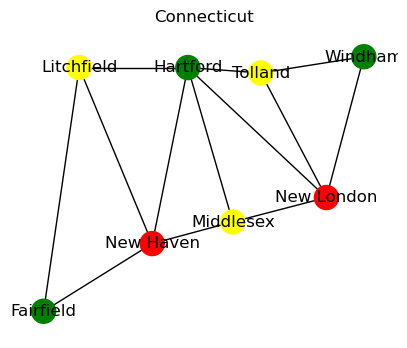

In [22]:
if connecticut_solution:
    draw_map("Connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 2. Color Connecticut with Three Colors

In [23]:
connecticut_solution = color_map(connecticut_graph, ["red", "blue", "green"], trace=False)

## Test Connecticut Solution

In [24]:
if connecticut_solution:
    test_coloring(connecticut_graph, connecticut_solution)

## Draw Connecticut Cartoon

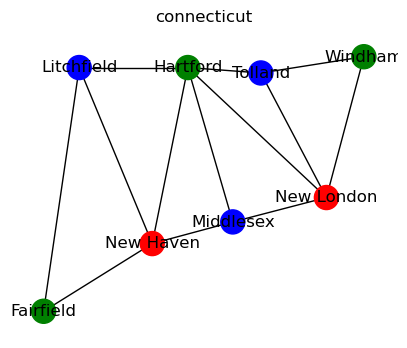

In [25]:
if connecticut_solution:
    draw_map("connecticut", connecticut_graph, (5,4), connecticut_solution)

## Problem 3. Color Europe with Four Colors

In [26]:
europe_graph = {
    "nodes":  ["Iceland", "Ireland", "United Kingdom", "Portugal", "Spain",
                 "France", "Belgium", "Netherlands", "Luxembourg", "Germany",
                 "Denmark", "Norway", "Sweden", "Finland", "Estonia",
                 "Latvia", "Lithuania", "Poland", "Czech Republic", "Austria",
                 "Liechtenstein", "Switzerland", "Italy", "Malta", "Greece",
                 "Albania", "Macedonia", "Kosovo", "Montenegro", "Bosnia Herzegovina",
                 "Serbia", "Croatia", "Slovenia", "Hungary", "Slovakia",
                 "Belarus", "Ukraine", "Moldova", "Romania", "Bulgaria",
                 "Cyprus", "Turkey", "Georgia", "Armenia", "Azerbaijan",
                 "Russia" ], 
    "edges": [(0,1), (0,2), (1,2), (2,5), (2,6), (2,7), (2,11), (3,4),
                 (4,5), (4,22), (5,6), (5,8), (5,9), (5,21), (5,22),(6,7),
                 (6,8), (6,9), (7,9), (8,9), (9,10), (9,12), (9,17), (9,18),
                 (9,19), (9,21), (10,11), (10,12), (10,17), (11,12), (11,13), (11,45), 
                 (12,13), (12,14), (12,15), (12,17), (13,14), (13,45), (14,15),
                 (14,45), (15,16), (15,35), (15,45), (16,17), (16,35), (17,18),
                 (17,34), (17,35), (17,36), (18,19), (18,34), (19,20), (19,21), 
                 (19,22), (19,32), (19,33), (19,34), (20,21), (21,22), (22,23),
                 (22,24), (22,25), (22,28), (22,29), (22,31), (22,32), (24,25),
                 (24,26), (24,39), (24,40), (24,41), (25,26), (25,27), (25,28),
                 (26,27), (26,30), (26,39), (27,28), (27,30), (28,29), (28,30),
                 (29,30), (29,31), (30,31), (30,33), (30,38), (30,39), (31,32),
                 (31,33), (32,33), (33,34), (33,36), (33,38), (34,36), (35,36),
                 (35,45), (36,37), (36,38), (36,45), (37,38), (38,39), (39,41),
                 (40,41), (41,42), (41,43), (41,44), (42,43), (42,44), (42,45),
                 (43,44), (44,45)],
    "coordinates": [( 18,147), ( 48, 83), ( 64, 90), ( 47, 28), ( 63, 34),
                   ( 78, 55), ( 82, 74), ( 84, 80), ( 82, 69), (100, 78),
                   ( 94, 97), (110,162), (116,144), (143,149), (140,111),
                   (137,102), (136, 95), (122, 78), (110, 67), (112, 60),
                   ( 98, 59), ( 93, 55), (102, 35), (108, 14), (130, 22),
                   (125, 32), (128, 37), (127, 40), (122, 42), (118, 47),
                   (127, 48), (116, 53), (111, 54), (122, 57), (124, 65),
                   (146, 87), (158, 65), (148, 57), (138, 54), (137, 41),
                   (160, 13), (168, 29), (189, 39), (194, 32), (202, 33),
                   (191,118)]}
print(europe_graph)

{'nodes': ['Iceland', 'Ireland', 'United Kingdom', 'Portugal', 'Spain', 'France', 'Belgium', 'Netherlands', 'Luxembourg', 'Germany', 'Denmark', 'Norway', 'Sweden', 'Finland', 'Estonia', 'Latvia', 'Lithuania', 'Poland', 'Czech Republic', 'Austria', 'Liechtenstein', 'Switzerland', 'Italy', 'Malta', 'Greece', 'Albania', 'Macedonia', 'Kosovo', 'Montenegro', 'Bosnia Herzegovina', 'Serbia', 'Croatia', 'Slovenia', 'Hungary', 'Slovakia', 'Belarus', 'Ukraine', 'Moldova', 'Romania', 'Bulgaria', 'Cyprus', 'Turkey', 'Georgia', 'Armenia', 'Azerbaijan', 'Russia'], 'edges': [(0, 1), (0, 2), (1, 2), (2, 5), (2, 6), (2, 7), (2, 11), (3, 4), (4, 5), (4, 22), (5, 6), (5, 8), (5, 9), (5, 21), (5, 22), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (9, 10), (9, 12), (9, 17), (9, 18), (9, 19), (9, 21), (10, 11), (10, 12), (10, 17), (11, 12), (11, 13), (11, 45), (12, 13), (12, 14), (12, 15), (12, 17), (13, 14), (13, 45), (14, 15), (14, 45), (15, 16), (15, 35), (15, 45), (16, 17), (16, 35), (17, 18), (17, 34), (17, 

In [27]:
europe_solution = color_map(europe_graph, ["red", "blue", "green", "yellow"], trace=False)

## Test Europe Solution

In [28]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

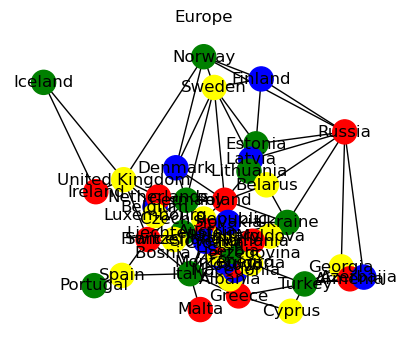

In [29]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Problem 4. Color Europe with Three Colors

In [30]:
europe_solution = color_map(europe_graph, ["red", "blue", "green"], trace=False)

## Test Europe Solution

In [31]:
if europe_solution:
    test_coloring(europe_graph, europe_solution)

## Draw Europe Cartoon

In [32]:
if europe_solution:
    draw_map("Europe", europe_graph, (5,4), europe_solution)

## Before You Submit...

1. Re-read the general instructions provided above, and
2. Hit "Kernel"->"Restart & Run All".